# CS 5830 Project 2
#### Anny Chen, Zion Steiner
**Question**: How is crime distributed about the city of Austin?

### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

### Data prep

In [2]:
df = pd.read_csv('crime-housing-austin-2015.csv')

In [3]:
# Convert dollar and percent values to floats
for col in df.select_dtypes(include=['object']):
    if '$' in df[col].iloc[0] or '%' in df[col].iloc[0]:
        df[col] = df[col].str.replace('\$|%', '').astype('float')
        
# Convert zip codes to str
df['Zip_Code_Crime'] = df['Zip_Code_Crime'].fillna(-1).astype('int32').apply(str)
df['Zip_Code_Housing'] = df['Zip_Code_Housing'].fillna(-1).astype('int32').apply(str)

In [4]:
# Impute missing data
num_subset = df.columns[14:]

for col in num_subset:
    # Zipcode specific imputation
    df[col].fillna(df.groupby('Zip_Code_Crime')[col].median(), inplace=True)
    # For cases where all data is missing from zipcode
    df[col].fillna(df[col].median(), inplace=True)

### Dataset attributes

In [5]:
df.head()

,Key,Council_District,Highest_Offense_Desc,Highest_NIBRS_UCR_Offense_Description,Report_Date,Location,Clearance_Status,Clearance_Date,District,Zip_Code_Crime,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
0,201510782,4.0,AGG ROBBERY/DEADLY WEAPON,Robbery,1-Jan-15,9001 N IH 35 SVRD NB,N,28-Jan-15,E,78753,...,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
1,201511231,4.0,ROBBERY BY ASSAULT,Robbery,1-Jan-15,919 E KOENIG LN SVRD EB,N,13-Jan-15,I,78751,...,68.0,10.0,97.0,42.0,23.0,38.0,97.0,98.0,550.0,40.0
2,201511736,1.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,12151 N IH 35 SVRD NB,N,13-Jan-15,E,78753,...,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
3,201511433,4.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,1044 NORWOOD PARK BLVD,N,5-Jan-15,I,78753,...,89.0,75.0,100.0,98.0,128.0,26.0,40.0,59.0,708.0,44.0
4,201511936,2.0,BURGLARY OF RESIDENCE,Burglary,1-Jan-15,2413 BITTER CREEK DR,N,7-Jan-15,F,78744,...,81.0,87.0,100.0,100.0,89.0,26.0,44.0,63.0,708.0,40.0


In [6]:
df.describe()

,Key,Council_District,Census_Tract,X_Coordinate,Y_Coordinate,Populationbelowpovertylevel,Medianhouseholdincome,Non-WhiteNon-HispanicorLatino,HispanicorLatinoofanyrace,Populationwithdisability,...,Rentalunitsaffordabletoaverageteacher,Ownerunitsaffordabletoaverageteacher,Rentalunitsaffordabletoaveragetechworker,Ownerunitsaffordabletoaveragetechworker,Changeinpercentageofpopulationbelowpoverty2000-2012,Changeinmedianrent2000-2012,Changeinmedianhomevalue2000-2012,Percentageofhomeswithin1/4-mioftransitstop,Averagemonthlytransportationcost,Percentageofhousingandtransportationcoststhatistransportation-related
count,3.857300e+04,38401.000000,38414.000000,3.798100e+04,3.798100e+04,38573.000000,38573.000000,38573.000000,38573.000000,38573.000000,...,38573.000000,38573.000000,38573.000000,38573.000000,38573.000000,38573.000000,38573.000000,38573.000000,38573.000000,38573.000000
mean,1.787442e+10,5.223458,72.426942,3.115612e+06,1.008005e+07,23.127758,50106.504654,15.955409,38.582195,9.075027,...,72.956109,36.761154,98.166438,72.232961,83.558992,36.278900,74.775231,66.470847,655.011511,37.815778
std,1.564763e+10,2.805340,686.752321,1.508935e+04,2.857887e+04,12.783794,20569.708287,6.931326,20.123794,2.222245,...,15.434680,28.167187,3.242680,28.664644,82.080948,24.764306,38.488378,25.832978,81.802661,5.733692
min,2.015103e+08,1.000000,1.010000,3.040396e+06,1.001173e+07,1.000000,11917.000000,4.000000,5.000000,3.000000,...,8.000000,0.000000,71.000000,6.000000,-20.000000,0.000000,-37.000000,0.000000,433.000000,23.000000
25%,2.015186e+10,3.000000,15.040000,3.106999e+06,1.005776e+07,16.000000,39593.000000,10.000000,19.000000,8.000000,...,68.000000,13.000000,99.000000,45.000000,33.000000,25.000000,49.000000,59.000000,629.000000,35.000000
50%,2.015500e+10,5.000000,18.230000,3.116494e+06,1.007645e+07,24.000000,41869.000000,16.000000,40.000000,9.000000,...,76.000000,28.000000,99.000000,86.000000,60.000000,28.000000,60.000000,76.000000,668.000000,40.000000
75%,2.015503e+10,8.000000,23.040000,3.126048e+06,1.010246e+07,29.000000,65672.000000,20.000000,57.000000,10.000000,...,83.000000,69.000000,100.000000,96.000000,128.000000,40.000000,93.000000,80.000000,708.000000,43.000000
max,2.015153e+12,10.000000,9800.000000,3.164242e+06,1.015923e+07,66.000000,127726.000000,36.000000,77.000000,17.000000,...,100.000000,87.000000,100.000000,100.000000,1242.000000,115.000000,207.000000,100.000000,865.000000,47.000000


In [7]:
df.columns

Index(['Key', 'Council_District', 'Highest_Offense_Desc',
       'Highest_NIBRS_UCR_Offense_Description', 'Report_Date', 'Location',
       'Clearance_Status', 'Clearance_Date', 'District', 'Zip_Code_Crime',
       'Census_Tract', 'X_Coordinate', 'Y_Coordinate', 'Zip_Code_Housing',
       'Populationbelowpovertylevel', 'Medianhouseholdincome',
       'Non-WhiteNon-HispanicorLatino', 'HispanicorLatinoofanyrace',
       'Populationwithdisability', 'Unemployment',
       'Largehouseholds(5+members)',
       'Homesaffordabletopeopleearninglessthan$50000',
       'Rentalsaffordabletopeopleearninglessthan$25000',
       'Rent-restrictedunits', 'HousingChoiceVoucherholders', 'Medianrent',
       'Medianhomevalue', 'Percentageofrentalunitsinpoorcondition',
       'Percentchangeinnumberofhousingunits2000-2012',
       'Ownerunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageretail/serviceworker',
       'Rentalunitsaffordabletoaverageartist',
       'Ownerunits

### Identify correlations of interest

In [8]:
# Find high correlations
from itertools import combinations

num_subset = df.columns[14:]
df_subset = df[num_subset]
combs = combinations(df_subset.columns, 2)

corrs = []
for comb in combs:
    corr, pval = stats.pearsonr(df_subset[comb[0]], df_subset[comb[1]])
    if corr >= 0.4:
        corrs.append((comb, corr, pval))
        
corrs.sort(key=lambda x: x[1], reverse=True)

In [9]:
corrs

[(('Homesaffordabletopeopleearninglessthan$50000',
   'Ownerunitsaffordabletoaverageteacher'),
  0.9965572497330673,
  0.0),
 (('Rentalsaffordabletopeopleearninglessthan$25000',
   'Rentalunitsaffordabletoaverageretail/serviceworker'),
  0.9845496765025599,
  0.0),
 (('Ownerunitsaffordabletoaverageretail/serviceworker',
   'Ownerunitsaffordabletoaverageartist'),
  0.9408826613139141,
  0.0),
 (('Ownerunitsaffordabletoaverageartist',
   'Ownerunitsaffordabletoaverageteacher'),
  0.9293125008246047,
  0.0),
 (('Homesaffordabletopeopleearninglessthan$50000',
   'Ownerunitsaffordabletoaverageartist'),
  0.9050512428582561,
  0.0),
 (('Percentageofrentalunitsinpoorcondition',
   'Rentalunitsaffordabletoaverageretail/serviceworker'),
  0.8883487176867016,
  0.0),
 (('Rentalunitsaffordabletoaverageteacher',
   'Rentalunitsaffordabletoaveragetechworker'),
  0.8679726567930366,
  0.0),
 (('Rentalsaffordabletopeopleearninglessthan$25000',
   'Percentageofrentalunitsinpoorcondition'),
  0.8601703

### Crime proportion by zip code

In [10]:
zip_code_crime_prop = pd.DataFrame(df['Zip_Code_Crime'].value_counts(normalize=True).reset_index())
zip_code_crime_prop.columns = ['Zip_Code_Crime', 'crime_prop']
zip_code_crime_prop
df = pd.merge(df, zip_code_crime_prop, on='Zip_Code_Crime')

In [11]:
# See what crime_prop is proportional to
display(df['crime_prop'].describe())

count    38573.000000
mean         0.046828
std          0.025235
min          0.000026
25%          0.024032
50%          0.049802
75%          0.066445
max          0.090011
Name: crime_prop, dtype: float64

In [12]:
display(df.corr()['crime_prop'].sort_values(ascending=False))

crime_prop                                                               1.000000
Ownerunitsaffordabletoaverageteacher                                     0.540611
Homesaffordabletopeopleearninglessthan$50000                             0.520392
HispanicorLatinoofanyrace                                                0.518378
Ownerunitsaffordabletoaverageartist                                      0.500552
Ownerunitsaffordabletoaverageretail/serviceworker                        0.406896
Rentalunitsaffordabletoaverageartist                                     0.388989
Rentalunitsaffordabletoaverageteacher                                    0.376258
Ownerunitsaffordabletoaveragetechworker                                  0.366587
Percentageofhomeswithin1/4-mioftransitstop                               0.360431
Rent-restrictedunits                                                     0.324227
Populationbelowpovertylevel                                              0.320102
X_Coordinate    

In [13]:
print(f"Crime_prop - ownerunitsaffodablebyteachers: {stats.pearsonr(df['crime_prop'], df['Ownerunitsaffordabletoaverageteacher'])}")
print(f"crime_prop - X_coord: {stats.pearsonr(df['crime_prop'].fillna(method='ffill'), df['X_Coordinate'].fillna(method='ffill'))}")

Crime_prop - ownerunitsaffodablebyteachers: (0.5406107127788234, 0.0)
crime_prop - X_coord: (0.2881715463888435, 0.0)


In [14]:
# Standardize crime_prop
mean = df['crime_prop'].mean()
std_dev = df['crime_prop'].std()
df['std_crime_prop'] = (df['crime_prop'] - mean) / std_dev

In [15]:
# Standardize household income
mean = df['Medianhouseholdincome'].mean()
std_dev = df['Medianhouseholdincome'].std()
df['std_income'] = (df['Medianhouseholdincome'] - mean) / std_dev

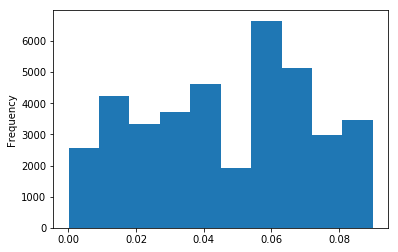

In [16]:
# Not normal but close enough
df['crime_prop'].plot.hist()

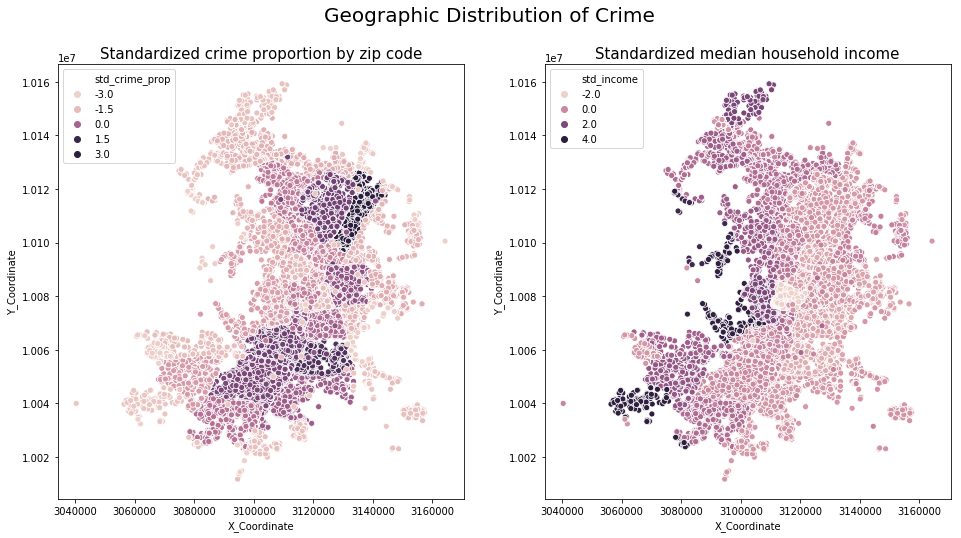

In [17]:
# Scatter plot of crime location
# plt.figure(figsize=(16, 16))
plt.figure(figsize=(16, 8))
plt.suptitle('Geographic Distribution of Crime', fontsize=20)
#sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='Highest_NIBRS_UCR_Offense_Description', data=df, ax=plt.subplot(221)).legend(loc='upper left')
#sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='Clearance_Status', data=df, ax=plt.subplot(222)).legend(loc='upper left')
ax1 = sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='std_crime_prop', data=df, ax=plt.subplot(121))
ax1.set_title('Standardized crime proportion by zip code', fontdict={'fontsize': 15})
ax1.legend(loc='upper left')
ax2 = sns.scatterplot(x='X_Coordinate', y='Y_Coordinate', hue='std_income', data=df, ax=plt.subplot(122))
ax2.set_title('Standardized median household income', fontdict={'fontsize': 15})
ax2.legend(loc='upper left')

plt.savefig('imgs/geoDistrCrime.png')
plt.show()

# T-TEST
### Question: Is crime more probable in the eastern half of the Austin?
The graphs above show that crime was more common in the eastern regions of the city in 2015. Is there any statistical significance to this, or is this just due to chance? 

**Note**: This test would be more meaningful if this dataset contained only a sample of the crimes reported in Austin in 2015. Because we have all the data, we can actually answer this question definitively but we'll do this for exercise.
### Term definitions:
* prob_crime_L: probability of a crime occuring west of X_Coordinate = 3100000
* prob_crime_R: probability of a crime occuring east of X_Coordinate = 3100000

### Hypotheses:
H_0: prob_crime_L == prob_crime_R
H_a: prob_crime_R

In [18]:
crime_L = df.loc[df['X_Coordinate'] < 3.1e6]
crime_R = df.loc[df['X_Coordinate'] >= 3.1e6]

In [19]:
# Do they have equal variances?
print(crime_L['crime_prop'].std())
print(crime_R['crime_prop'].std())
# Close enough

0.020746173599847435
0.024494558972252778


In [20]:
stats.ttest_ind(crime_L['crime_prop'], crime_R['crime_prop'])

Ttest_indResult(statistic=-62.00265755032987, pvalue=0.0)

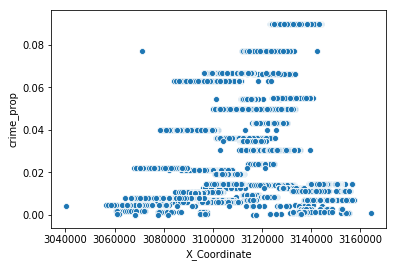

In [21]:
sns.scatterplot(df['X_Coordinate'], df['crime_prop'])